# Práctica 4 : Entrenamiento de redes neuronales

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat
import displayData as display

In [78]:
# Calcula el valor de la función sigmoide
def sigmoid(X):
    z = 1/(1 + np.exp(-X))
    return z

In [79]:
def fun_coste (all_thetas, X, Y):
    H = propagacionHaciaAdelante(all_thetas, X)
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    cost = (- 1 / (len(Y))) * np.sum(Term1 + Term2)
    
    return cost

In [88]:
def fun_coste_reg(all_thetas, X, Y, lam):
    H = propagacionHaciaAdelante(all_thetas, X)
    m = len(Y)
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    Term3 = 0
    for thetas in all_thetas:
        Term3 += np.sum(np.square(thetas))
        
    cost = (- np.sum(Term1 + Term2) / m)  + (lam / (2*m)) * Term3
    
    return cost

In [89]:
def oneVsAll(X, y, num_etiquetas, reg):
    
    ''' oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización 'reg' y devuelve el resultado en una matriz, donde
    la fila i−ésima corresponde al clasificador de la etiqueta i−ésima '''
    
    # Número de columnas y filas
    n = X.shape[1] # 400
    m = len(y) # 5000
    
    y = (y - 1)
        
    y_onehot = np.zeros((m, num_etiquetas))
    
    for i in range(m):
        y_onehot[i][y[i]] = 1
        
    all_thetas = np.zeros((num_etiquetas, n))
    
    for c in range(num_etiquetas):
        theta_inicial = np.zeros(n)
        result = opt.fmin_tnc(func=fun_coste_reg, x0=theta_inicial, fprime=gradient_reg, args=(X, y_onehot[:, c], reg))
        all_thetas[c] = result[0]
        
    return all_thetas

In [90]:
# Propagación hacia delante para varias capas
def propagacionHaciaAdelante(all_thetas, X):
    for i in range(len(all_thetas)-1):
        capaI = sigmoid(np.matmul(X,all_thetas[i].T))
        capaI = np.hstack([np.ones([np.shape(capaI)[0], 1]), capaI])
    return sigmoid(np.matmul(capaI, all_thetas[len(all_thetas)-1].T))

In [91]:
weights = loadmat ( 'ex4weights.mat')
Theta1 , Theta2 = weights['Theta1'], weights['Theta2']
all_thetas = weights['Theta1'], weights['Theta2']
data = loadmat('ex4data1.mat')
y = data['y'].ravel() #(5000, 1) --> (5000,)
X = data['X']

m = len(y)
input_size = X.shape[1]
num_labels = 10

y = (y - 1)
y_onehot = np.zeros((m, num_labels)) #5000 x 10

for i in range(m):
    y_onehot[i][y[i]] = 1
print(y_onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


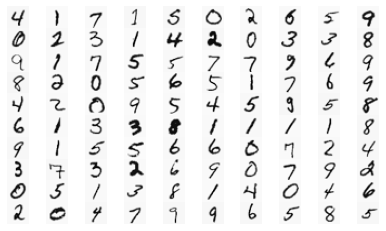

In [92]:
sample = np.random.choice(X.shape[0], 100)
asd = display.displayData(X[sample, :])

In [93]:
X = np.hstack([np.ones([np.shape(X)[0], 1]), X])

In [94]:
fun_coste (all_thetas, X, y)

958.7567113446556

In [95]:
lam = 0.1
fun_coste_reg(all_thetas, X, y, lam)

958.7663972077638